In [25]:
!pip install newsapi-python

In [26]:
import pandas as pd
from newsapi import NewsApiClient
from IPython.display import JSON

In [28]:
newsapi=NewsApiClient(api_key=NEW_API)
top_headlines=newsapi.get_top_headlines(q="bitcoin",sources="bbc-news,the-verge",
                                        language="en")

In [29]:
sources=newsapi.get_sources()

In [ ]:
sources["sources"]

In [31]:
data=[]
for source in sources["sources"]:
  id=source["id"]
  name=source["name"]
  description=source["description"]
  url=source["url"]
  kategori=source["category"]
  language=source["language"]
  country=source["country"]

  data.append({"name":name,"id":id,"description":description,"url":url,"kategori":kategori,"language":language,"country":country})
df=pd.DataFrame(data)
df


,name,id,description,url,kategori,language,country
0,ABC News,abc-news,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us
1,ABC News (AU),abc-news-au,"Australia's most trusted source of local, nati...",http://www.abc.net.au/news,general,en,au
2,Aftenposten,aftenposten,Norges ledende nettavis med alltid oppdaterte ...,https://www.aftenposten.no,general,no,no
3,Al Jazeera English,al-jazeera-english,"News, analysis from the Middle East and worldw...",http://www.aljazeera.com,general,en,us
4,ANSA.it,ansa,"Agenzia ANSA: ultime notizie, foto, video e ap...",http://www.ansa.it,general,it,it
...,...,...,...,...,...,...,...
123,Wired,wired,"Wired is a monthly American magazine, publishe...",https://www.wired.com,technology,en,us
124,Wired.de,wired-de,Wired reports on how emerging technologies aff...,https://www.wired.de,technology,de,de
125,Wirtschafts Woche,wirtschafts-woche,Das Online-Portal des führenden Wirtschaftsmag...,http://www.wiwo.de,business,de,de
126,Xinhua Net,xinhua-net,"中国主要重点新闻网站,依托新华社遍布全球的采编网络,记者遍布世界100多个国家和地区,地方频...",http://xinhuanet.com/,general,zh,zh


In [32]:
df.head()

,name,id,description,url,kategori,language,country
0,ABC News,abc-news,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us
1,ABC News (AU),abc-news-au,"Australia's most trusted source of local, nati...",http://www.abc.net.au/news,general,en,au
2,Aftenposten,aftenposten,Norges ledende nettavis med alltid oppdaterte ...,https://www.aftenposten.no,general,no,no
3,Al Jazeera English,al-jazeera-english,"News, analysis from the Middle East and worldw...",http://www.aljazeera.com,general,en,us
4,ANSA.it,ansa,"Agenzia ANSA: ultime notizie, foto, video e ap...",http://www.ansa.it,general,it,it


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         128 non-null    object
 1   id           128 non-null    object
 2   description  128 non-null    object
 3   url          128 non-null    object
 4   kategori     128 non-null    object
 5   language     128 non-null    object
 6   country      128 non-null    object
dtypes: object(7)
memory usage: 7.1+ KB


In [34]:
#crearting workflow
def json_to_dataframe(api_key):
  newsapi=NewsApiClient(api_key=api_key)
  top_headlines=newsapi.get_top_headlines(q="bitcoin",sources="bbc-news,the-verge",language="en")
  sources=newsapi.get_sources()
  data=[]
  for source in sources["sources"]:
    id=source["id"]
    name=source["name"]
    category=source["category"]
    description=source["description"]
    country=source["country"]
    language=source["language"]
    url=source["url"]
    data.append({"id":id,"name":name,"category":category,"description":description,"country":country,"language":language,"url":url})
  df=pd.DataFrame(data)
  return df

In [35]:
df=json_to_dataframe(NEW_API)

In [36]:
df["category"].nunique()

7

In [60]:
df["category"]=df["category"].astype("category")

In [43]:
def choose_category_to_see_url(category_type):
  print(df.loc[df["category"]==category_type,"url"])

In [44]:
choose_category_to_see_url("science")

76           http://news.nationalgeographic.com
80    https://www.newscientist.com/section/news
84                https://www.nextbigfuture.com
Name: url, dtype: object


In [47]:
def choose_language(language_type):
  language=df.loc[df.language=="en",df.columns]
  return language

In [50]:
choose_language("en")

,id,name,category,description,country,language,url
0,abc-news,ABC News,general,"Your trusted source for breaking news, analysi...",us,en,https://abcnews.go.com
1,abc-news-au,ABC News (AU),general,"Australia's most trusted source of local, nati...",au,en,http://www.abc.net.au/news
3,al-jazeera-english,Al Jazeera English,general,"News, analysis from the Middle East and worldw...",us,en,http://www.aljazeera.com
6,ars-technica,Ars Technica,technology,The PC enthusiast's resource. Power users and ...,us,en,http://arstechnica.com
8,associated-press,Associated Press,general,The AP delivers in-depth coverage on the inter...,us,en,https://apnews.com/
...,...,...,...,...,...,...,...
119,the-washington-times,The Washington Times,general,The Washington Times delivers breaking news an...,us,en,https://www.washingtontimes.com/
120,time,Time,general,Breaking news and analysis from TIME.com. Poli...,us,en,http://time.com
121,usa-today,USA Today,general,"Get the latest national, international, and po...",us,en,http://www.usatoday.com/news
122,vice-news,Vice News,general,"Vice News is Vice Media, Inc.'s current affair...",us,en,https://news.vice.com


In [77]:
df.query("category=='general'&country=='us'&language=='en'") #create method this line

,id,name,category,description,country,language,url
0,abc-news,ABC News,general,"Your trusted source for breaking news, analysi...",us,en,https://abcnews.go.com
3,al-jazeera-english,Al Jazeera English,general,"News, analysis from the Middle East and worldw...",us,en,http://www.aljazeera.com
8,associated-press,Associated Press,general,The AP delivers in-depth coverage on the inter...,us,en,https://apnews.com/
10,axios,Axios,general,Axios are a new media company delivering vital...,us,en,https://www.axios.com
17,breitbart-news,Breitbart News,general,Syndicated news and opinion website providing ...,us,en,http://www.breitbart.com
22,cbs-news,CBS News,general,CBS News: dedicated to providing the best in j...,us,en,http://www.cbsnews.com
23,cnn,CNN,general,View the latest news and breaking news today f...,us,en,http://us.cnn.com
38,fox-news,Fox News,general,"Breaking News, Latest News and Current News fr...",us,en,http://www.foxnews.com
41,google-news,Google News,general,"Comprehensive, up-to-date news coverage, aggre...",us,en,https://news.google.com
73,msnbc,MSNBC,general,Breaking news and in-depth analysis of the hea...,us,en,http://www.msnbc.com


<Axes: >

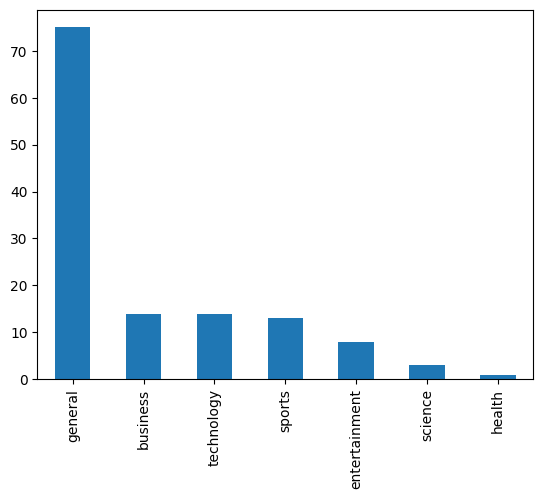

In [66]:
df["category"].value_counts().plot(kind="bar")

<Axes: >

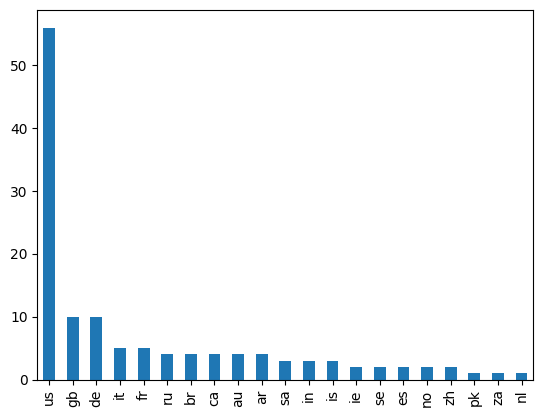

In [81]:
df["country"].value_counts().plot(kind="bar")

<Axes: >

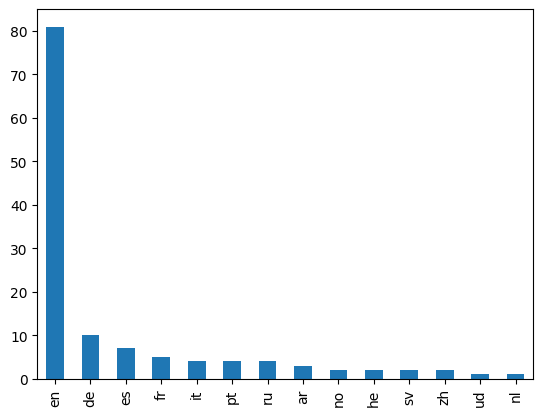

In [82]:
df["language"].value_counts().plot(kind="bar")

<Axes: >

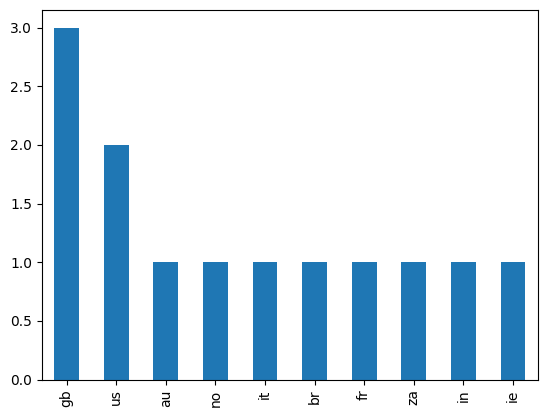

In [91]:
df[df["description"].str.contains("spor")]["country"].value_counts().plot(kind="bar")

In [ ]:
#column ekleme _name__main readme projeleri string metoları plotlar textden hangi kategori olduğunu bulma